In [7]:
using SymPy

In [8]:
using Plots

In [9]:
using Roots

In [10]:
using LinearAlgebra

In [11]:
using DifferentialEquations

##### Ordinary Differential Equations with Boundary Value Problem
###### Exercise 2
> Diberikan PDB dengan MNB berikut.
$$x''-\dfrac{1}{t}x'+\dfrac{1}{t^2}x=1$$ 
pada interval $[0.5,4.5]$ dengan nilai batas $x(0.5)=1$ dan $y(4.5)=2$.

Solusi aktual dari MNB di atas adalah $x(t)=t^2 - 0.2525826491t-2.528442297 t \ln t$.

3. Carilah solusi numerik PDB di atas menggunakan *__finite-difference method__* dengan ukuran langkah $h=1/2, 1/4,$ dan $1/16$.
    1. Bandingkan fungsi hampiran tersebut dengan solusi aktual menggunakan plot ! 
    2. Gambarkan juga plot selisih fungsi hampiran tersebut dengan solusi aktual !

In [ ]:
##################################################################################################

$$x''=
\dfrac{1}{t}x'
-\dfrac{1}{t^2}x
+1$$

$$\begin{align} 
\frac{y_{i+1} - 2y_i + y_{i-1}}{h^2}
=
1
+ \frac{1}{t_i} \left( \frac{y_{i+1}-y_{i-1}}{2h} \right )
- \frac{1}{t^2_i} y_i
\end{align}$$

<center> dikali $2h^2t_i^2$

$$\begin{align}
\left( y_{i+1} - 2y_i + y_{i-1} \right )
2 t_i^2
=
2 h^2 t_i^2
+ \left( y_{i+1}-y_{i-1} \right) ht_i
- 2h^2y_i
\end{align}$$

$$\begin{align}
\left( 2 t_i^2 + ht_i \right ) y_{i-1}
+  \left( 2 h^2 - 4 t_i^2 \right ) y_{i}
+ \left( 2 t_i^2  - h t_i \right ) y_{i+1}
= 2 h^2 t_i^2
\end{align}$$

<center>atau

$$\begin{align}
P(h,t_i) y_{i-1}
+  Q(h,t_i) y_{i}
+ R(h,t_i) y_{i+1}
= S(h,t_i)
\end{align}$$

<center>dengan

$$
P(h,t_i)
= \left( 2 t_i^2 + h t_i \right)
\quad
Q(h,t_i)
= \left( 2 h^2 - 4 t_i^2 \right )
\quad
R(h,t_i)
= \left( 2 t_i^2  - h t_i \right )
\quad
S(h,t_i)
= 2 h^2 t_i^2
$$

<center> Untuk

$$i=1,2,...,n$$

$$\begin{align}
Q(h,t_1) y_{1}
+ R(h,t_1) y_{2}
& = S(h,t_1) - P(h,t_1) y_{0}
\\
P(h,t_2) y_{1}
+  Q(h,t_2) y_{2}
+ R(h,t_2) y_{3}
& = S(h,t_2)
\\
P(h,t_3) y_{2}
+  Q(h,t_3) y_{3}
+ R(h,t_3) y_{4}
& = S(h,t_3)
\\
\vdots
\\
P(h,t_{n-1}) y_{n-2}
+  Q(h,t_{n-1}) y_{n-1}
& = S(h,t_{n-1})
- R(h,t_{n-1}) y_{n}
\end{align}$$

In [1]:
##################################################################################################

jika $y_0=a$, $y_n=b$ dan $y_n=a+nh$,

maka,

$$
\begin{align}
y_n &= a + nh
\\
b &= a + nh
\\
n &= \frac{b-a}{h}
\end{align}
$$

In [ ]:
##################################################################################################

untuk $h=\frac{1}{2}=0.5$, maka $x(0.5)= y_0 = 1$ dan $x(4.5)= y_8 = 2$.

untuk $h=\frac{1}{4}=0.25$, maka $x(0.5)= y_0 = 1$ dan $x(4.5)= y_{16}= 2$.

untuk $h=\frac{1}{16}=0.0625$, maka $x(0.5)= y_0 = 1$ dan $x(4.5)= y_{64} = 2$.

In [ ]:
##################################################################################################

case:

$h=\frac{1}{2}=0.5$, $y_0 = 1$ dan $y_8 = 2$.

$\begin{align}
P(0.5 , t_i)
& = 2 t_i^2 + (0.5) t_i
\\
Q(0.5 , t_i)
& =  2 (0.5)^2 - 4 t_i^2
= 2 (0.25) - 4 t_i^2
= 0.5 - 4 t_i^2
\\
R(0.5 , t_i)
& = 2 t_i^2  - h t_i
= 2 t_i^2  - (0.5) t_i
\\
S(0.5 , t_i)
& = 2 h^2 t_i^2
= 2 (0.5)^2 t_i^2
= 2 (0.25) t_i^2
= 0.5 t_i^2
\end{align}$

In [2]:
P = [2*(t^2)+(0.5)*t for t in 1:0.5:7.5];

In [3]:
Q = [0.5-4*(t^2) for t in 1:0.5:8];

In [4]:
R = [2*(t^2)-0.5*t for t in 1:0.5:7.5];

In [5]:
S = [0.5*(t^2) for t in 1:0.5:8];

In [12]:
PQR = Tridiagonal(P,Q,R)

15×15 Tridiagonal{Float64, Vector{Float64}}:
 -3.5   1.5      ⋅       ⋅       ⋅    …      ⋅        ⋅        ⋅        ⋅ 
  2.5  -8.5     3.75     ⋅       ⋅           ⋅        ⋅        ⋅        ⋅ 
   ⋅    5.25  -15.5     7.0      ⋅           ⋅        ⋅        ⋅        ⋅ 
   ⋅     ⋅      9.0   -24.5    11.25         ⋅        ⋅        ⋅        ⋅ 
   ⋅     ⋅       ⋅     13.75  -35.5          ⋅        ⋅        ⋅        ⋅ 
   ⋅     ⋅       ⋅       ⋅     19.5   …      ⋅        ⋅        ⋅        ⋅ 
   ⋅     ⋅       ⋅       ⋅       ⋅           ⋅        ⋅        ⋅        ⋅ 
   ⋅     ⋅       ⋅       ⋅       ⋅           ⋅        ⋅        ⋅        ⋅ 
   ⋅     ⋅       ⋅       ⋅       ⋅           ⋅        ⋅        ⋅        ⋅ 
   ⋅     ⋅       ⋅       ⋅       ⋅           ⋅        ⋅        ⋅        ⋅ 
   ⋅     ⋅       ⋅       ⋅       ⋅    …    69.0       ⋅        ⋅        ⋅ 
   ⋅     ⋅       ⋅       ⋅       ⋅       -168.5     81.25      ⋅        ⋅ 
   ⋅     ⋅       ⋅       ⋅       ⋅         87.75  -195.

In [13]:
B = S 
B[1] = S[1] - P[1] #perlu diperiksa lagi
B[end] = B[end] - P[14]
B

15-element Vector{Float64}:
  -2.0
   1.125
   2.0
   3.125
   4.5
   6.125
   8.0
  10.125
  12.5
  15.125
  18.0
  21.125
  24.5
  28.125
 -84.25

In [14]:
Y = PQR\B

15-element Vector{Float64}:
  0.4750241728632159
 -0.2249435966524962
 -0.5265549343211353
 -0.7115210856502847
 -0.8505130835148228
 -0.9642302749748363
 -1.0573698113292533
 -1.1277312767106047
 -1.1688050768629823
 -1.1702230119681762
 -1.1173092018503665
 -0.9901052892542095
 -0.7619637058530069
 -0.3976948715577351
  0.1487983216493671

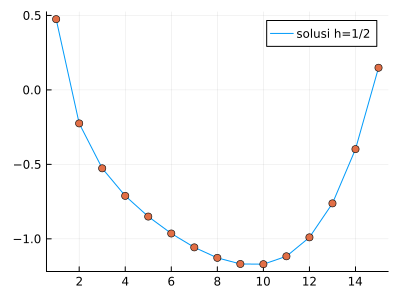

In [15]:
solu = [Y]
plot(solu, label = "solusi h=1/2",size=(400,300))
scatter!(solu, label = :none)

<center> sedangkan solusi aktualnya adalah

$$x(t)=t^2 - 0.2525826491t-2.528442297 t \ln t$$

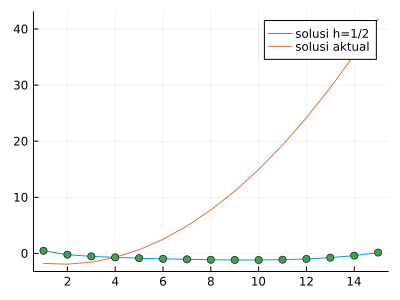

In [16]:
sol_ak = [(t^2)-0.2525826491*t-2.528442297*t for t in 1:0.5:8];
plot(solu, label = "solusi h=1/2",size=(400,300))
plot!(sol_ak, label = "solusi aktual", size=(400,300))
scatter!(solu, label = :none)

In [ ]:
##################################################################################################

$$
P(h,t_i)
= \left( 2 t_i^2 + h t_i \right)
\quad
Q(h,t_i)
= \left( 2 h^2 - 4 t_i^2 \right )
\quad
R(h,t_i)
= \left( 2 t_i^2  - h t_i \right )
\quad
S(h,t_i)
= 2 h^2 t_i^2
$$

case:

$h=\frac{1}{4}=0.25$, $y_0 = 1$ dan $y_{16} = 2$.

$\begin{align}
P(0.25 , t_i)
& = 2 t_i^2 + (0.5) t_i
\\
Q(0.25 , t_i)
& =  2 (0.5)^2 - 4 t_i^2
= 2 (0.25) - 4 t_i^2
= 0.5 - 4 t_i^2
\\
R(0.25 , t_i)
& = 2 t_i^2  - h t_i
= 2 t_i^2  - (0.5) t_i
\\
S(0.25 , t_i)
& = 2 h^2 t_i^2
= 2 (0.5)^2 t_i^2
= 2 (0.25) t_i^2
= 0.5 t_i^2
\end{align}$

In [2]:
P = [2*(t^2)+(0.5)*t for t in 1:0.5:7.5];

In [3]:
Q = [0.5-4*(t^2) for t in 1:0.5:8];

In [4]:
R = [2*(t^2)-0.5*t for t in 1:0.5:7.5];

In [5]:
S = [0.5*(t^2) for t in 1:0.5:8];

In [12]:
PQR = Tridiagonal(P,Q,R)

15×15 Tridiagonal{Float64, Vector{Float64}}:
 -3.5   1.5      ⋅       ⋅       ⋅    …      ⋅        ⋅        ⋅        ⋅ 
  2.5  -8.5     3.75     ⋅       ⋅           ⋅        ⋅        ⋅        ⋅ 
   ⋅    5.25  -15.5     7.0      ⋅           ⋅        ⋅        ⋅        ⋅ 
   ⋅     ⋅      9.0   -24.5    11.25         ⋅        ⋅        ⋅        ⋅ 
   ⋅     ⋅       ⋅     13.75  -35.5          ⋅        ⋅        ⋅        ⋅ 
   ⋅     ⋅       ⋅       ⋅     19.5   …      ⋅        ⋅        ⋅        ⋅ 
   ⋅     ⋅       ⋅       ⋅       ⋅           ⋅        ⋅        ⋅        ⋅ 
   ⋅     ⋅       ⋅       ⋅       ⋅           ⋅        ⋅        ⋅        ⋅ 
   ⋅     ⋅       ⋅       ⋅       ⋅           ⋅        ⋅        ⋅        ⋅ 
   ⋅     ⋅       ⋅       ⋅       ⋅           ⋅        ⋅        ⋅        ⋅ 
   ⋅     ⋅       ⋅       ⋅       ⋅    …    69.0       ⋅        ⋅        ⋅ 
   ⋅     ⋅       ⋅       ⋅       ⋅       -168.5     81.25      ⋅        ⋅ 
   ⋅     ⋅       ⋅       ⋅       ⋅         87.75  -195.